1. Поборотися із зниклими даними.

In [5]:
import pandas as pd

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df = pd.read_csv("adult.data", header=None, names=columns, na_values=" ?", skipinitialspace=True)

print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [6]:
df_dropped = df.dropna()
print(f"Форма після видалення: {df_dropped.shape}")


Форма після видалення: (32561, 15)


In [8]:
import pandas as pd

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv("adult.data", header=None, names=columns, na_values=" ?", skipinitialspace=True)

def normalize(data):
    min_val = data.min()
    max_val = data.max()
    norm_data = (data - min_val) / (max_val - min_val)
    return norm_data

def standardize(data):
    mean_val = data.mean()
    std_val = data.std()
    standard_data = (data - mean_val) / std_val
    return standard_data

numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_normalized = df.copy()
for col in numerical_columns:
    df_normalized[col] = normalize(df_normalized[col])

df_standardized = df.copy()
for col in numerical_columns:
    df_standardized[col] = standardize(df_standardized[col])

print("Перші 5 рядків нормованих даних:")
print(df_normalized[numerical_columns].head())

print("\nПерші 5 рядків стандартизованих даних:")
print(df_standardized[numerical_columns].head())


Перші 5 рядків нормованих даних:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours-per-week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  

Перші 5 рядків стандартизованих даних:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.030670 -1.063594       1.134721      0.148451     -0.216656   
1  0.837096 -1.008692       1.134721     -0.145918     -0.216656   
2 -0.042641  0.245075      -0.420053     -0.145918     -0.216656   
3  1.057031  0.425795      -1.197440     -0.145918     -0.216656   
4 -0.775756  1.408154       1.134721     -0.145918     -0.

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.

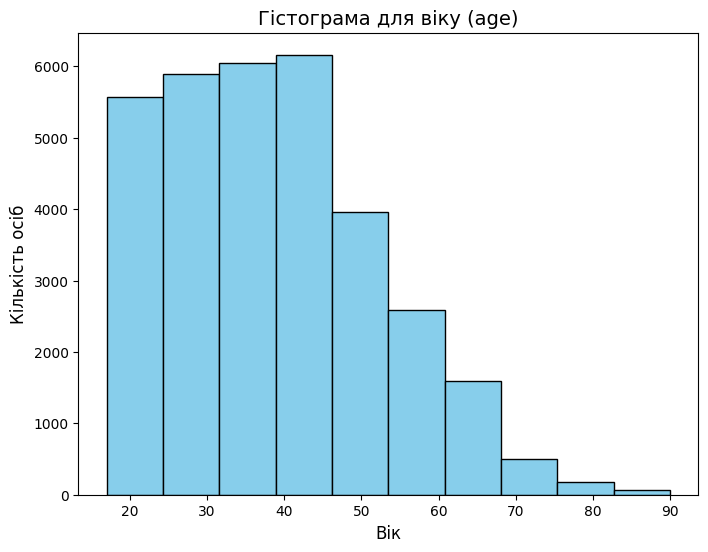

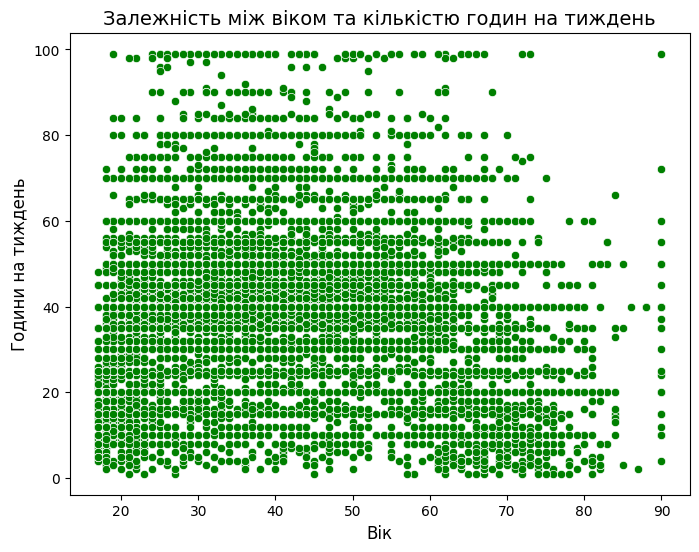

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Гістограма для віку (age)', fontsize=14)
plt.xlabel('Вік', fontsize=12)
plt.ylabel('Кількість осіб', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['hours-per-week'], color='green')
plt.title('Залежність між віком та кількістю годин на тиждень', fontsize=14)
plt.xlabel('Вік', fontsize=12)
plt.ylabel('Години на тиждень', fontsize=12)
plt.show()


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [10]:
import scipy.stats as stats

attr1 = 'age' 
attr2 = 'hours-per-week'  

pearson_corr, _ = stats.pearsonr(df[attr1], df[attr2])
print(f"Коефіцієнт кореляції Пірсона між {attr1} і {attr2}: {pearson_corr}")

spearman_corr, _ = stats.spearmanr(df[attr1], df[attr2])
print(f"Коефіцієнт кореляції Спірмена між {attr1} і {attr2}: {spearman_corr}")


Коефіцієнт кореляції Пірсона між age і hours-per-week: 0.06875570750955738
Коефіцієнт кореляції Спірмена між age і hours-per-week: 0.14290681031958297


6. Провести One Hot Encoding категоріального string атрибуту.

In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_column = 'workclass'

encoder = OneHotEncoder(sparse_output=False, drop='first')  

encoded_data = encoder.fit_transform(df[[categorical_column]])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([categorical_column]))

df_encoded = pd.concat([df, encoded_df], axis=1)

print(df_encoded.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  ...  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  ...   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male  ...   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male  ...   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male  ...   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female  ...   

   native-country  income  workclass_Federal-gov workclass_Local-gov  \
0   United-States   <=50K                    0.0                 0.0   
1   Unit

7. Провести візуалізацію багатовимірних даних, використовуючи

приклади, наведені у медіумі

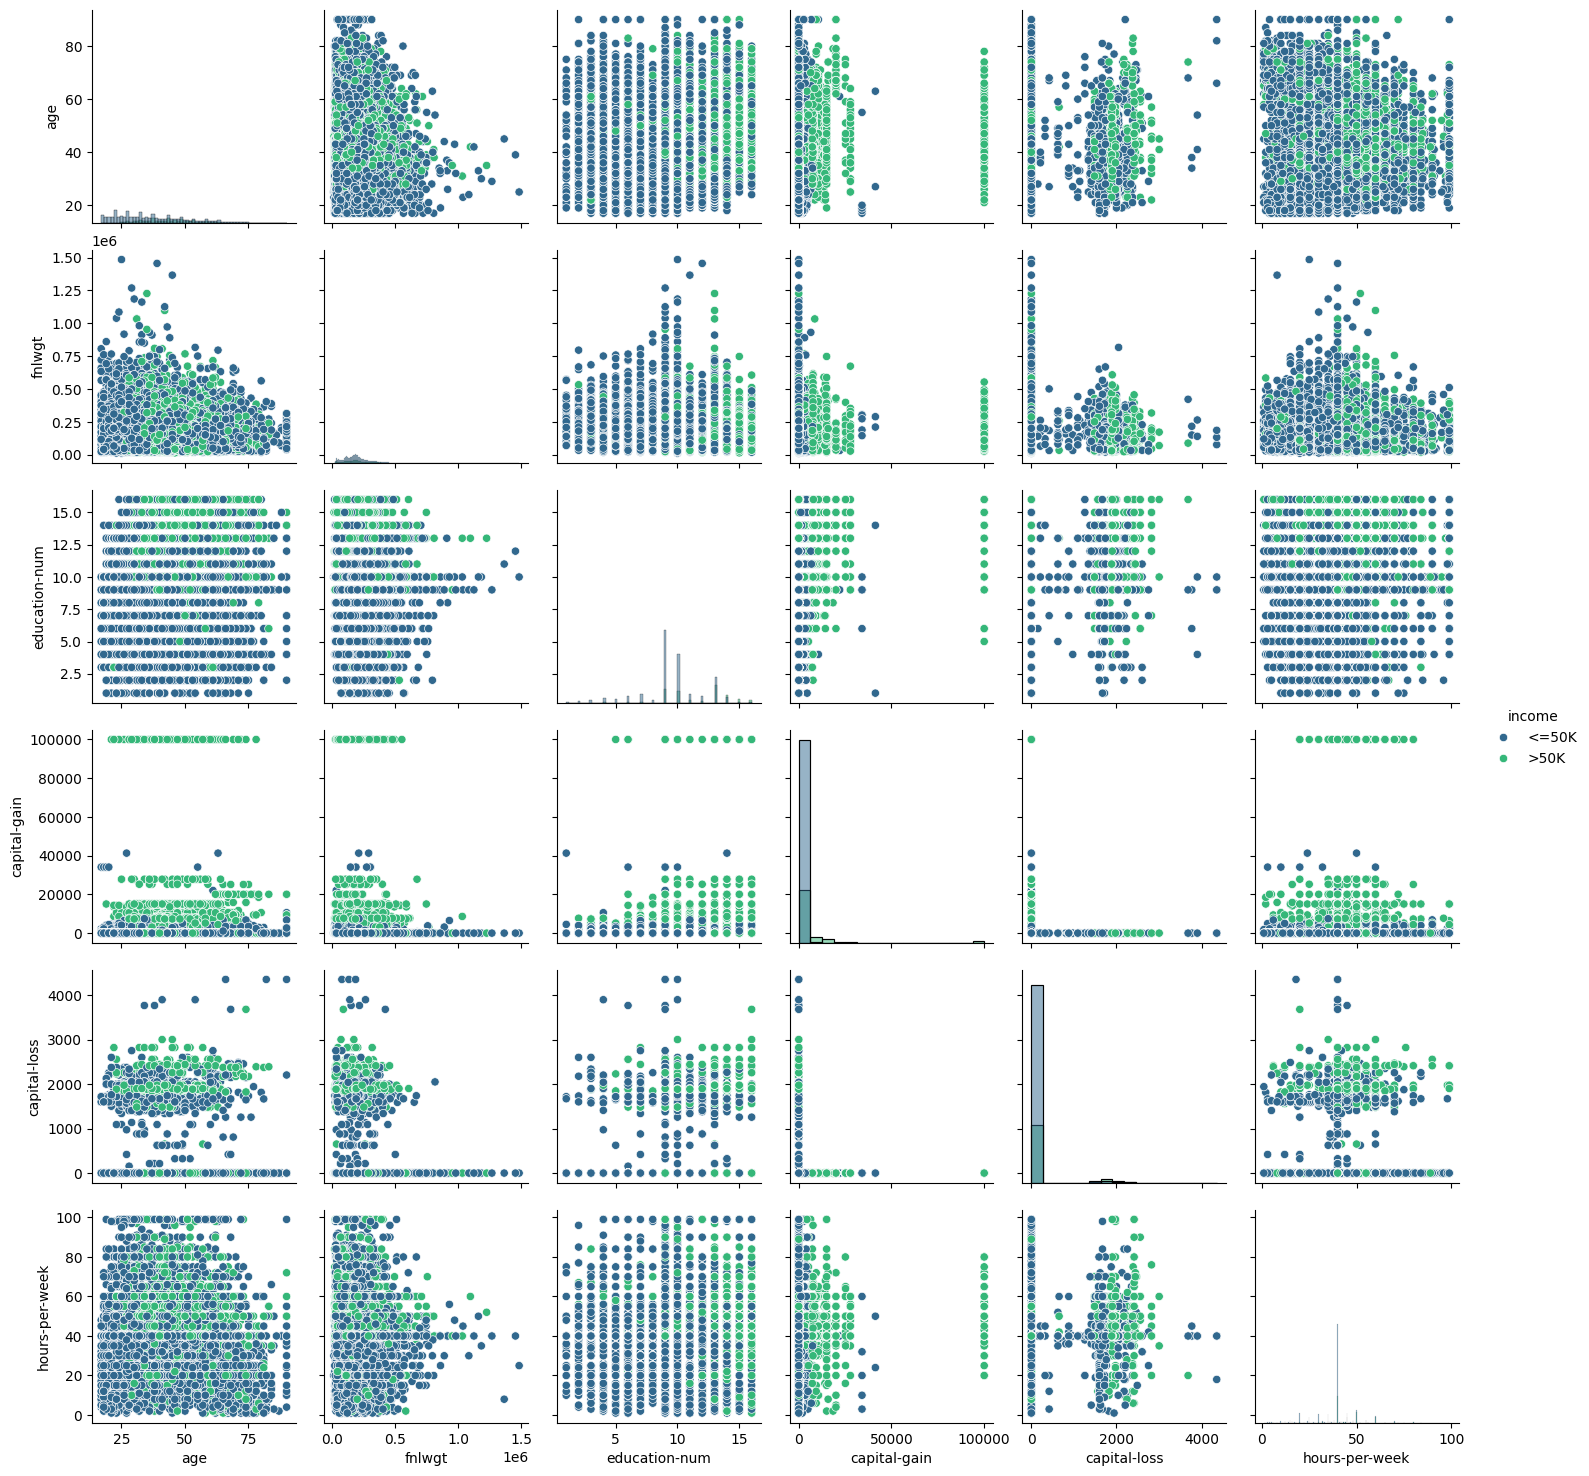

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

sns.pairplot(df[numerical_columns], hue='income', palette='viridis', diag_kind='hist')

plt.show()
